In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:


df=pd.read_csv(r'C:\Users\Admin\Desktop\python projects\smmh.csv')
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


C:\Users\Admin\AppData\Local\Temp\ipykernel_11768\3251635077.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Issue', y='Frequency', data=df_melted, ci=None)


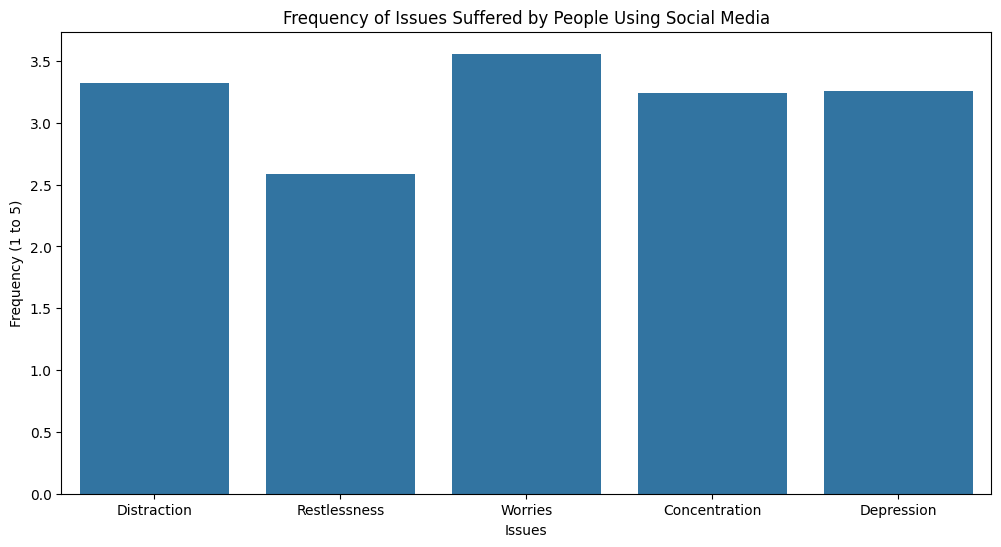

In [4]:
import matplotlib.pyplot as plt

# Select relevant columns
issues_columns = [
    '10. How often do you get distracted by Social media when you are busy doing something?',
    '11. Do you feel restless if you haven\'t used Social media in a while?',
    '13. On a scale of 1 to 5, how much are you bothered by worries?',
    '14. Do you find it difficult to concentrate on things?',
    '18. How often do you feel depressed or down?'
]

# Rename columns for better readability
df_issues = df[issues_columns].rename(columns={
    '10. How often do you get distracted by Social media when you are busy doing something?': 'Distraction',
    '11. Do you feel restless if you haven\'t used Social media in a while?': 'Restlessness',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'Worries',
    '14. Do you find it difficult to concentrate on things?': 'Concentration',
    '18. How often do you feel depressed or down?': 'Depression'
})

# Melt the dataframe for seaborn
df_melted = df_issues.melt(var_name='Issue', value_name='Frequency')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Issue', y='Frequency', data=df_melted, ci=None)
plt.title('Frequency of Issues Suffered by People Using Social Media')
plt.ylabel('Frequency (1 to 5)')
plt.xlabel('Issues')
plt.show()

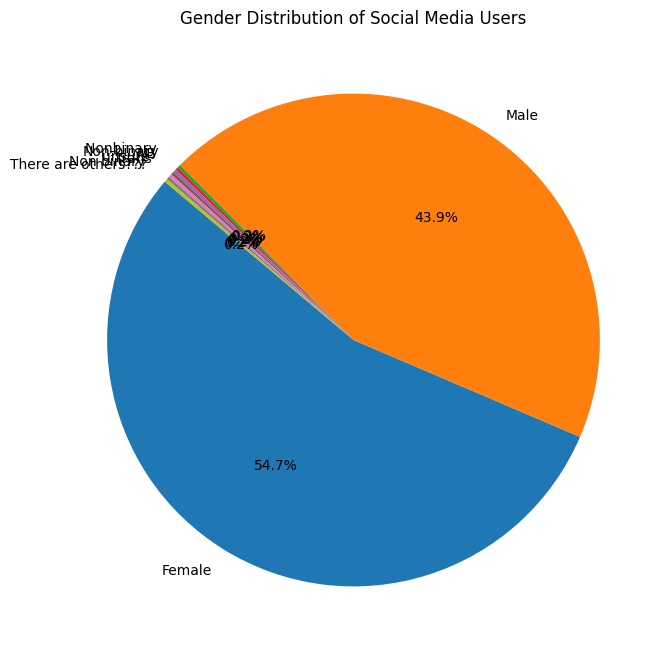

In [5]:
# Count the number of occurrences of each gender
gender_counts = df['2. Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Social Media Users')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11768\118351564.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')


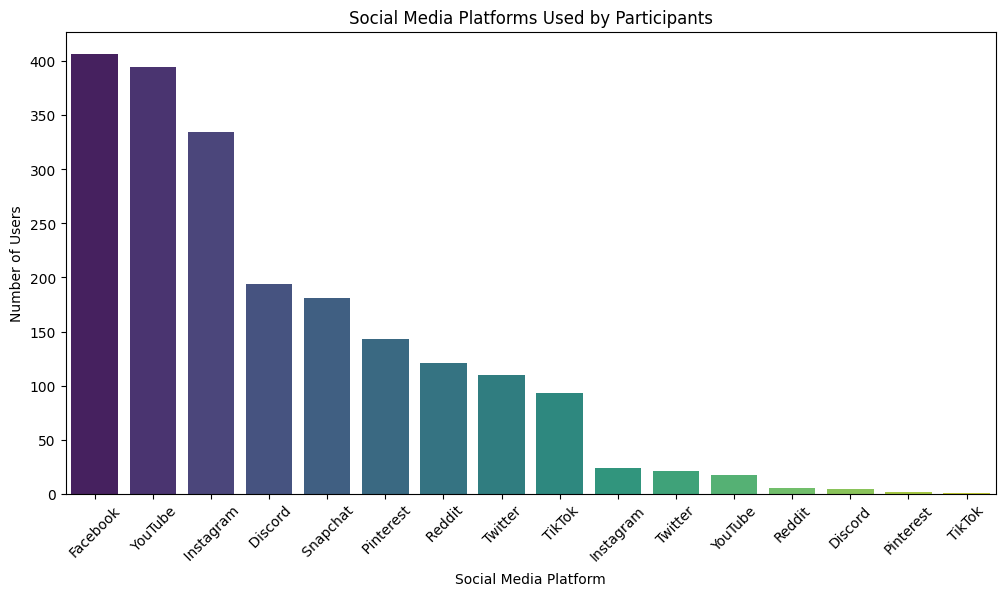

In [6]:
# Split the social media platforms into separate rows
df_social_media = df['7. What social media platforms do you commonly use?'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_social_media.name = 'Platform'

# Count the occurrences of each platform
platform_counts = df_social_media.value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.title('Social Media Platforms Used by Participants')
plt.ylabel('Number of Users')
plt.xlabel('Social Media Platform')
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11768\4211591707.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=single_platform_counts.index, y=single_platform_counts.values, palette='viridis')


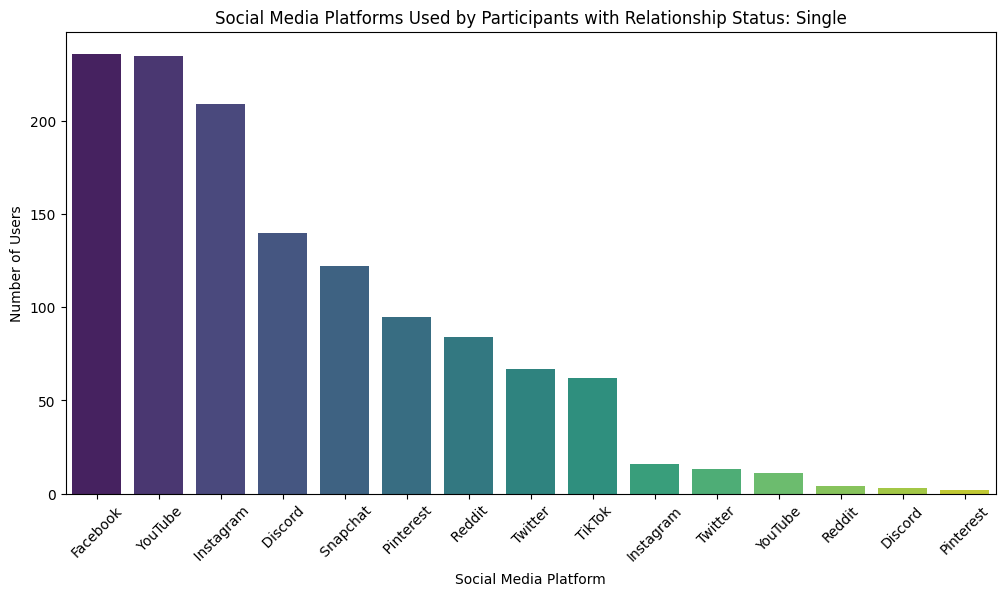

In [7]:
# Filter the dataframe for a single participant's relationship status
participant_status = 'Single'  # Change this to the desired relationship status
df_single_status = df[df['3. Relationship Status'] == participant_status]

# Split the social media platforms into separate rows for the filtered dataframe
df_single_social_media = df_single_status['7. What social media platforms do you commonly use?'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_single_social_media.name = 'Platform'

# Count the occurrences of each platform for the filtered dataframe
single_platform_counts = df_single_social_media.value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=single_platform_counts.index, y=single_platform_counts.values, palette='viridis')
plt.title(f'Social Media Platforms Used by Participants with Relationship Status: {participant_status}')
plt.ylabel('Number of Users')
plt.xlabel('Social Media Platform')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Convert the '8. What is the average time you spend on social media every day?' column to a numerical format
time_mapping = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 6
}

df['Average Time (hours)'] = df['8. What is the average time you spend on social media every day?'].map(time_mapping)

# Group by '4. Occupation Status' and calculate the mean
average_time_by_occupation = df.groupby('4. Occupation Status')['Average Time (hours)'].mean()

print(average_time_by_occupation)

4. Occupation Status
Retired               3.437500
Salaried Worker       2.609848
School Student        3.908163
University Student    3.883562
Name: Average Time (hours), dtype: float64
